In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

#note that x y values must be in 'meters'

def quadraticII(x, y, a, b, c, d, e, f, g, h, i, j):
     
    if (e*x + f*y + i)**2 - 4*c*(a*(x)**2 + b*(y)**2 + d*x*y + g*x + h*y + j) < 0.0:
        delta = 0
        print("delta < 0!")
        z1 =  (-(e*x + f*y + i)) / (2*c)
        z2 =  (-(e*x + f*y + i)) / (2*c)
                    
    else:
        delta = (e*x + f*y + i)**2 - 4*c*(a*(x)**2 + b*(y)**2 + d*x*y + g*x + h*y + j)
    
        z1 =  (-(e*x + f*y + i) + np.sqrt(delta)) / (2*c)
        z2 =  (-(e*x + f*y + i) - np.sqrt(delta)) / (2*c)
    return z1, z2

def quadraticIII(x, y, a, b, c, d, e, f, g, h, i, j):
    x = x.all()
    y = y.all()
    
    if (e*x + f*y + i)**2 - 4*c*(a*(x)**2 + b*(y)**2 + d*x*y + g*x + h*y + j) < 0.0:
        delta = 0
        print("delta < 0!")
        z1 =  (-(e*x + f*y + i)) / (2*c)
        z2 =  (-(e*x + f*y + i)) / (2*c)
                    
    else:
        delta = (e*x + f*y + i)**2 - 4*c*(a*(x)**2 + b*(y)**2 + d*x*y + g*x + h*y + j)
    
        z1 =  (-(e*x + f*y + i) + np.sqrt(delta)) / (2*c)
        z2 =  (-(e*x + f*y + i) - np.sqrt(delta)) / (2*c)
    return z2

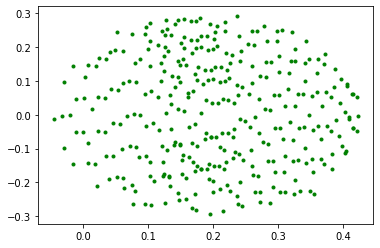

In [2]:
#plot 3d points from rim surface which is in m1rf
m1pts = np.loadtxt('temp.sfc', skiprows=2)
#now test z return function with real x y values from the measured data
xre = m1pts[:,0]/1000
yre = m1pts[:,1]/1000
xre = xre[1::10]
yre = yre[1::10]
#take only every 10th value from real rim points in xy

# X, Y = np.meshgrid(xre, yre)
# print(X.shape)

fig = plt.figure(2)
plt.plot(xre,yre,'g.')
plt.show()



In [3]:
print(len(xre))

342


In [4]:
#Use ideal mirror parameters as initial guess for quadratic
#returns z points for given xy points
initialpars = (-0.00274866, -0.00274866, -7e-5, 1.4e-23, 4.8e-22, 1e-22, 5.6e-19, 1.8e-20, -0.00183404, -1e-6)
#initial pars vars = A      B           C       D        E         F      G        H        I            J
zre1 = np.array([])
zre2 = np.array([])

for i in range(len(xre)):
    #print(xre[i], yre[i])    
    z1, z2 = quadraticII(xre[i], yre[i], *initialpars)
    zre1 = np.append(zre1, z1)
    zre2 = np.append(zre2, z2)

Text(0.5, 0, 'z')

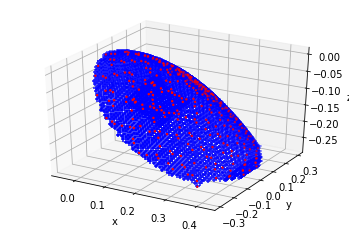

In [5]:
#plot returned z values on measured zxy points
%matplotlib inline
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(m1pts[:,0]/1000, m1pts[:,1]/1000, m1pts[:,2]/1000, c='b', marker='+')
ax.scatter(xre, yre, zre2, c='r', linewidth=None, s=2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [6]:
#test pars from other program
opars = [-2.12946985e+03, -2.14752915e+03, -2.69507279e+01,  1.51878244e+00,4.79717339e+01, -2.30043513e+00, -1.12499455e+00, -5.86749641e-01, -1.43627457e+03,  1.00000000e-06]
#initial pars vars = A      B           C       D        E         F      G        H        I            J
zre1 = np.array([])
zre2 = np.array([])

for i in range(len(xre)):
    #print(xre[i], yre[i])    
    z1, z2 = quadraticII(xre[i], yre[i], *opars)
    zre1 = np.append(zre1, z1)
    zre2 = np.append(zre2, z2)

Text(0.5, 0, 'z')

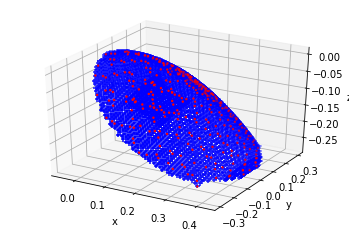

In [7]:
#plot returned z values on measured zxy points
%matplotlib inline
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(m1pts[:,0]/1000, m1pts[:,1]/1000, m1pts[:,2]/1000, c='b', marker='+')
ax.scatter(xre, yre, zre2, c='r', linewidth=None, s=2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [8]:
#compare z vals based on different parameters
zre1 = np.array([])
zre2 = np.array([])
zre1t = np.array([])
zre2t = np.array([])
for i in range(len(xre)):
    #print(xre[i], yre[i])    
    z1, z2 = quadraticII(xre[i], yre[i], *initialpars)
    zre1 = np.append(zre1, z1)
    zre2 = np.append(zre2, z2)
    z1, z2 = quadraticII(xre[i], yre[i], *opars)
    zre1t = np.append(zre1t, z1)
    zre2t = np.append(zre2t, z2)

In [9]:
#print(zre2t-zre2)
print(zre2t,zre2)

[-0.27332615 -0.27107431 -0.27344605 -0.27302053 -0.26389546 -0.2657366
 -0.26592471 -0.2637996  -0.26552506 -0.25426323 -0.26057381 -0.26144397
 -0.254145   -0.26442279 -0.25345096 -0.24576444 -0.25568666 -0.25358156
 -0.23859122 -0.24113932 -0.26106477 -0.24139496 -0.22949699 -0.23545835
 -0.25850844 -0.24147395 -0.22357853 -0.22325779 -0.24069771 -0.25999887
 -0.22890093 -0.21408082 -0.21727045 -0.23802636 -0.24981695 -0.21957103
 -0.20584773 -0.21019564 -0.2322135  -0.24499559 -0.21345644 -0.19836844
 -0.20152677 -0.2225171  -0.24642339 -0.21155114 -0.19248591 -0.19149958
 -0.20880033 -0.24229416 -0.21816536 -0.19135279 -0.18202562 -0.1912467
 -0.21795268 -0.23512725 -0.19883427 -0.17817355 -0.17578827 -0.19199047
 -0.22480263 -0.21847369 -0.18516636 -0.16850683 -0.17055395 -0.19102748
 -0.22727377 -0.20598344 -0.17467075 -0.16038421 -0.16497156 -0.18796664
 -0.22653211 -0.19792176 -0.16679113 -0.15300273 -0.15829377 -0.18198165
 -0.2210802  -0.1928521  -0.16085837 -0.14615101 -0.1

(342,) (342,)


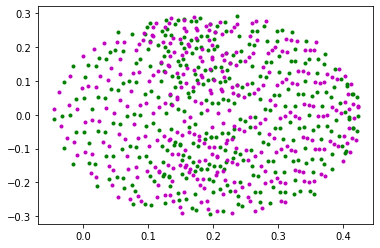

In [10]:
#test pars from other program
opars = [-2.12946985e+03, -2.14752915e+03, -2.69507279e+01,  1.51878244e+00,4.79717339e+01, -2.30043513e+00, -1.12499455e+00, -5.86749641e-01, -1.43627457e+03,  1.00000000e-06]
initialpars = (-0.00274866, -0.00274866, -7e-5, 1.4e-23, 4.8e-22, 1e-22, 5.6e-19, 1.8e-20, -0.00183404, -1e-6)
#initial pars vars = A      B           C       D        E         F      G        H        I            J

#create another circle of points
xre = m1pts[:,0]/1000
yre = m1pts[:,1]/1000
xre1 = xre[1::10]
yre1 = yre[1::10]
xret = xre[4::10]
yret = yre[4::10]
print(xre1.shape,xret.shape)

fig = plt.figure(2)
plt.plot(xre1,yre1,'g.')
plt.plot(xret,yret,'m.')
plt.show()

zre1t = np.array([])
zre2t = np.array([])
for i in range(len(xret)):

    z1, z2 = quadraticII(xret[i], yret[i], *opars)
    zre1t = np.append(zre1t, z1)
    zre2t = np.append(zre2t, z2)

Text(0.5, 0, 'z')

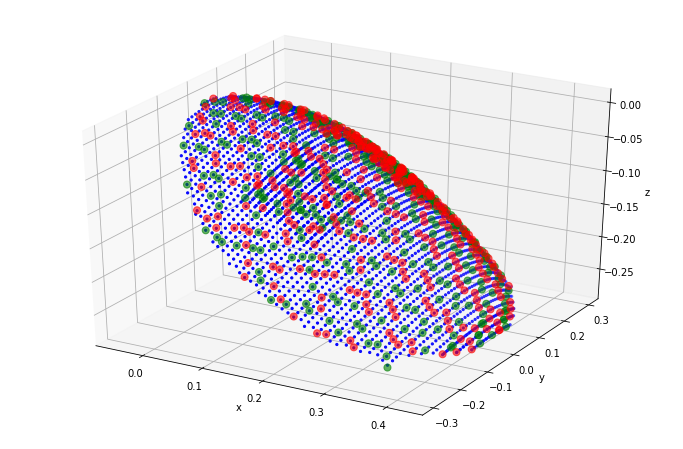

In [55]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(m1pts[:,0]/1000, m1pts[:,1]/1000, m1pts[:,2]/1000, c='b', marker='.')
ax.scatter(xre1, yre1, zre2, c='g', marker='.', linewidth=None, s=200, alpha=0.6)
ax.scatter(xret, yret, zre2t, c='r', marker='.', linewidth=None, s=200, alpha=0.6)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [12]:
print(xret.shape, yret.shape, zre2t.shape)

(342,) (342,) (342,)


In [13]:
#analyse two parameter sets on same set of x y points
modpars = [-2.12946985e+03, -2.14752915e+03, -2.69507279e+01,  1.51878244e+00,4.79717339e+01, -2.30043513e+00, -1.12499455e+00, -5.86749641e-01, -1.43627457e+03,  1.00000000e-06]
initialpars = (-0.00274866, -0.00274866, -7e-5, 1.4e-23, 4.8e-22, 1e-22, 5.6e-19, 1.8e-20, -0.00183404, -1e-6)
#initial pars vars = A      B           C       D        E         F      G        H        I            J

#create another circle of points
xre = m1pts[:,0]/1000
yre = m1pts[:,1]/1000
xre = xre[1::10]
yre = yre[1::10]

zre1 = np.array([])
zre2 = np.array([])
zre1mod = np.array([])
zre2mod = np.array([])
for i in range(len(xre)):

    z1, z2 = quadraticII(xre[i], yre[i], *initialpars)
    zre1 = np.append(zre1, z1)
    zre2 = np.append(zre2, z2)
    
    z1, z2 = quadraticII(xre[i], yre[i], *modpars)
    zre1mod = np.append(zre1mod, z1)
    zre2mod = np.append(zre2mod, z2)

Text(0.5, 0, 'z difference')

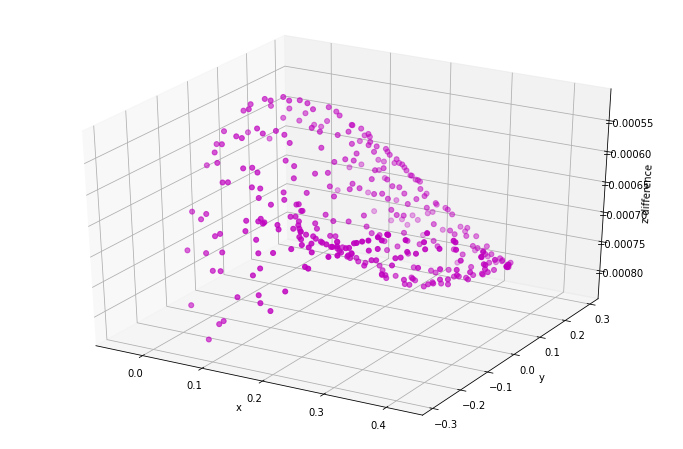

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xre1, yre1, zre2-zre2mod, c='m', marker='.', linewidth=None, s=100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z difference")

(342,) (342,)
(342,)
max % difference between models 47.10108326490876


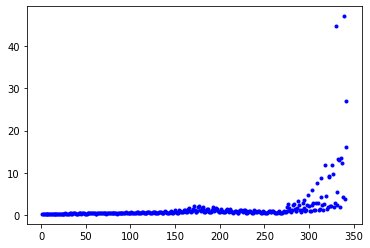

In [15]:
#simple % diff analysis
%matplotlib inline
pdiff = zre2-zre2mod
print(pdiff.shape, zre2.shape)
pdiff = ((pdiff) / zre2 ) * 100
print(pdiff.shape)
print("max % difference between models", max(pdiff))
plt.plot(np.linspace(1,len(pdiff), len(pdiff)), pdiff, 'b.', linewidth=None)

(342,) (342,)
(342,)
max % difference between models 47.10108326490876


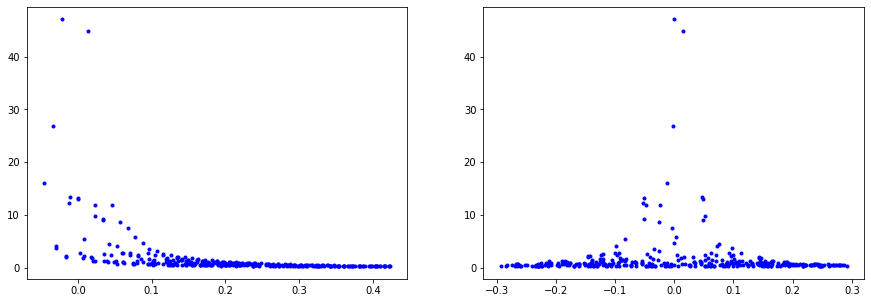

In [16]:
#simple % diff analysis
%matplotlib inline
pdiff = zre2-zre2mod
print(pdiff.shape, zre2.shape)
pdiff = ((pdiff) / zre2 ) * 100
print(pdiff.shape)
print("max % difference between models", max(pdiff))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(xre, pdiff, 'b.', linewidth=None)
plt.subplot(1,2,2)
plt.plot(yre, pdiff, 'b.', linewidth=None)
plt.show()

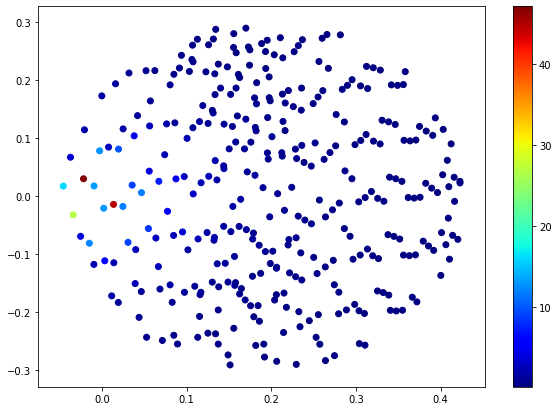

In [44]:
#plot error as z value for a xy plot
%matplotlib inline
pdiff = zre2-zre2mod
#pdiff = (abs(pdiff) / abs(zre2)) * 100.0
pdiff = (pdiff / zre2) * 100.0

plt.figure(figsize=(10,7))
plt.scatter(xret, yret, c=pdiff, cmap='jet')
plt.colorbar()
plt.show()
#must test more xy points near 0,0

In [34]:
pdiff = zre2-zre2mod
print(pdiff.shape, max(abs(pdiff)), max(abs(zre2)))

(342,) 0.0008261678223237534 0.27416570320760275


In [77]:
print(max(abs(pdiff)) / max(abs(zre2))*100.0) 
print(np.mean(pdiff))

0.30133886648038016
-0.0006715983517281381


In [132]:
#use this code to find what range of accuracies are represented

pdiff = zre2-zre2mod
#pdiff = (abs(pdiff) / abs(zre2)) * 100.0
pdiff = (pdiff / zre2) * 100.0

accuracy = 6e-4 #meters... 0.5 mm = 0.5e-3 m
accuracy = 0.75e-3 # 0.75e-6 mm
accuracy = 10 #in percentage terms

errar = np.array([])
for i in pdiff:

    if abs(i) > accuracy:
        errar = np.append(errar, i)
        
print(len(errar)/len(zre2) * 100, "% of fitting points in error > {} %".format(accuracy))
print(max(errar))


2.923976608187134 % of fitting points in error > 10 %
47.10108326490876


In [151]:
#use this code with the max % difference and find associated error
#it shows with the highest error values of 47%, the difference is 5.7e-4  m = 5.7e-1 mm = 0.57 mm
pdiff = (zre2-zre2mod) 
pdiffer = (pdiff / zre2) *100
accuracy = 47
errorarr = np.array([])
for i in range(pdiff.shape[0]):

    if abs(pdiff[i] / zre2[i] *100) > accuracy:
        print("max difference  = ", pdiff[i], "m @ {} %".format(accuracy))

max difference  =  -0.0005694613317530297 m @ 47 %


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


Text(0.5, 1.0, 'Ideal mirror equation vs Juddzone equation paramters')

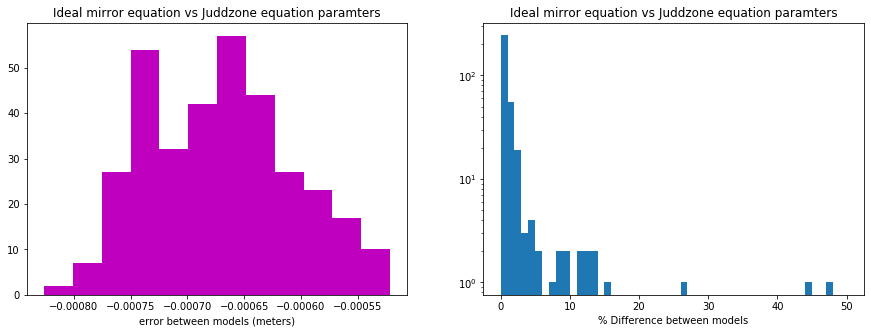

In [120]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
hist, bin_edges = np.histogram(pdiff, density=True)
plt.hist(pdiff, bins='auto', histtype='bar', color='m')
plt.xlabel('error between models (meters)')
plt.title('Ideal mirror equation vs Juddzone equation paramters')

plt.subplot(1,2,2)
bins = np.linspace(0,50,51)
print(bins)
hist, bin_edges = np.histogram(((pdiff / zre2) * 100.0), density=True)
plt.hist(((pdiff / zre2) * 100.0), bins=bins, histtype='bar')
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('% Difference between models')
plt.title('Ideal mirror equation vs Juddzone equation paramters')

In [ ]:
#show also consider z difference between measured data to 2 models